In [9]:
import numpy as np
from sklearn import datasets
import seaborn as sns
import pandas as pd

In [132]:
iris = datasets.load_iris()
df = pd.DataFrame()
df['SepalLength'] = iris.data[:, 0]
df['SepalWidth'] = iris.data[:, 1]
df['PetalLength'] = iris.data[:, 2]
df['PetalWidth'] = iris.data[:, 3]
df['Target'] = (iris.target != 0) * 1

In [147]:
def NB_stats(df):
    Features_name = list(df.columns[:-1]) # Noms des variables indépendantes
    Labels_name = df.iloc[:,-1].unique() # Valeurs des différentes classes
    df_stats=pd.DataFrame()
    for column_name in Features_name:
        for label in Labels_name:
            mu = []
            var = []
            mu.append(df.loc[(df.iloc[:,-1] == label), column_name].mean())
            var.append(df.loc[(df.iloc[:,-1] == label), column_name].var())
            
            df_stats[column_name + '_' + str(label) + '_' + 'mu'] = mu
            df_stats[column_name + '_' + str(label) + '_' + 'var'] = var
        
    return df_stats

In [134]:
def Gaussian_prob(mu,var, x):
    p = 1/np.sqrt(np.pi*2*var)*np.exp(-(x-mu)**2/2/var)
    return p

In [139]:
def NB_binary(df,df_stats):
    N_rows = df.shape[0] # nombre d'observations
    N_features = df.shape[1]-1 # Nombre de variables indépendantes
    Features_name = list(df.columns[:-1]) # Liste des noms des variables

    pred = []
    for i in range(N_rows):
        p_0 = 1
        p_1 = 1
        for feature in range(N_features):
            # Calcule de la probabilité d'appartenir à la classe 1
            p_0 = p_0 * Gaussian_prob(df_stats[Features_name[feature] + '_' + str(0) + '_' + 'mu'],
                                      df_stats[Features_name[feature] + '_' + str(0) + '_' + 'var'],
                                      df.iloc[i,feature]).values
            # Calcule de la probabilité d'appartenir à la classe 2
            p_1 = p_1 * Gaussian_prob(df_stats[Features_name[feature] + '_' + str(1) + '_' + 'mu'],
                                      df_stats[Features_name[feature] + '_' + str(1) + '_' + 'var'],
                                      df.iloc[i,feature]).values
        if p_0 > p_1:
            # Si p_0 > p_1 alors l'obsevation appartient à la classe 1
            pred.append(0)
        else:
            # Si p_0 < p_1 alors l'obsevation appartient à la classe 2
            pred.append(1)
            
    return pred         

In [148]:
from sklearn.metrics import accuracy_score

df_stats = NB_stats(df)
pred = NB_binary(df, df_stats)

print('NB_Score:', accuracy_score(y,pred))

NB_Score: 1.0


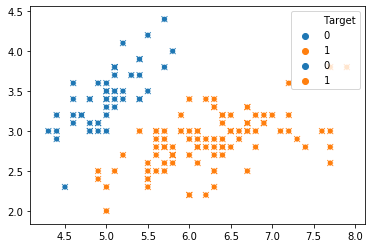

In [137]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=df['Target'])
sns.scatterplot(x=X[:,0], y=X[:,1], hue=pred, marker='x')